📊 0. Leitura e pré processamento de dados

<a href="https://colab.research.google.com/github/anaC-Fernandes/ProjetoDados/blob/main/Notebooks/Dataset_Agro.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import r2_score



df = pd.read_csv('https://raw.githubusercontent.com/anaC-Fernandes/ProjetoDados/refs/heads/main/Datasets/BrStats.csv', sep = ";", low_memory=False)
for coluna in df.columns:
    df[coluna] = df[coluna].astype(str)  # Garante que é string
    df[coluna] = df[coluna].str.replace('.', '', regex=False)  # Remove separador de milhar
    df[coluna] = df[coluna].str.replace(',', '.', regex=False)  # Converte decimal
    df[coluna] = pd.to_numeric(df[coluna], errors='ignore')  # Converte para número, ignorando erros
df

for coluna in df.columns:
  df[coluna] = df[coluna].astype(str)  # Garante que é string
  df[coluna] = df[coluna].str.replace('nan', '0', regex=False)  # Converte decimal

df

C:\Users\Renan\AppData\Local\Temp\ipykernel_10196\1305971939.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[coluna] = pd.to_numeric(df[coluna], errors='ignore')  # Converte para número, ignorando erros
C:\Users\Renan\AppData\Local\Temp\ipykernel_10196\1305971939.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[coluna] = pd.to_numeric(df[coluna], errors='ignore')  # Converte para número, ignorando erros
C:\Users\Renan\AppData\Local\Temp\ipykernel_10196\1305971939.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[coluna] = pd.to_numeric(df[coluna], errors='ignore')  # Converte para número, ignorando erros
C:\Users\Renan\A

,Ano,CDMunicipio,Populacao,PessoalOcupado,PessoalAssalariado,VrSalarios,PIB,QtEmpresas,AreaPlantada_h,AreaColhida_h,...,Exportacoes_US$,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,NrNascimentos,NrObitosInfantis,povoamento,UF,Municipio,Regiao
0,2016,3509452,5932,854,537,13692,111190,2520,380,380,...,0,25511889.220,18911068.400,1665392.540,800,0,32.065,SP,Campina do Monte Alegre,Sudeste
1,2016,3123601,27505,5680,4778,104977,554663,6710,30,30,...,1777256.000,63002672.933,45304154.440,538882.600,2990,30,55.065,MG,Elói Mendes,Sudeste
2,2016,3552007,6193,668,580,12519,62441,830,00,00,...,0,30492825.449,21861157.950,1048458.040,590,20,14.930,SP,Silveiras,Sudeste
3,2016,3305604,21279,3087,2669,80161,403121,2900,00,00,...,0,140538926.872,100508822.360,871234.340,2720,20,22.698,RJ,Silva Jardim,Sudeste
4,2016,1717008,4534,212,183,5309,48551,340,940,340,...,0,15541375.953,13178989.760,8037.870,430,10,2.908,TO,Pindorama do Tocantins,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33415,2021,2705408,7171,463,436,10502,0,320,00,00,...,0,0,0,0,1350,30,83.287,AL,Monteirópolis,Nordeste
33416,2021,1600105,9265,428,383,9932,0,380,00,00,...,0,0,0,0,1600,20,1.010,AP,Amapá,Norte
33417,2019,2605459,3061,2210,1773,43093,192775,2890,00,00,...,0,0,0,0,320,10,180.059,PE,Fer0do de Noronha,Nordeste
33418,2020,1503002,7070,538,514,12207,63579,320,00,00,...,0,0,0,0,1490,40,0.601,PA,Faro,Norte


In [4]:
df['Ano'] = df['Ano'].astype(int)
df['CDMunicipio'] = df['CDMunicipio'].astype(str)
df['Populacao'] = df['Populacao'].astype(int)
df['PessoalOcupado'] = df['PessoalOcupado'].astype(int)
df['PessoalAssalariado'] = df['PessoalAssalariado'].astype(int)
df['VrSalarios'] = df['VrSalarios'].astype(int)
df['PIB'] = df['PIB'].astype(int)
df['QtEmpresas'] = df['QtEmpresas'].astype(int)
df['AreaPlantada_h'] = df['AreaPlantada_h'].astype(int)
df['AreaColhida_h'] = df['AreaColhida_h'].astype(int)
df['VlProducaoAgricola'] = df['VlProducaoAgricola'].astype(int)
df['VlProducaoPecuaria'] = df['VlProducaoPecuaria'].astype(int)
df['Area'] = df['Area'].astype(float)
df['Importacoes_US$'] = df['Importacoes_US$'].astype(float)
df['Exportacoes_US$'] = df['Exportacoes_US$'].astype(float)
df['Receitas_R$'] = df['Receitas_R$'].astype(float)
df['Transferencias_correntes_R$'] = df['Transferencias_correntes_R$'].astype(float)
df['Transferencias_capital_R$'] = df['Transferencias_capital_R$'].astype(float)
df['NrNascimentos'] = df['NrNascimentos'].astype(int)
df['NrObitosInfantis'] = df['NrObitosInfantis'].astype(int)
df['povoamento'] = df['povoamento'].astype(float)



📊 1. Exploração inicial dos dados

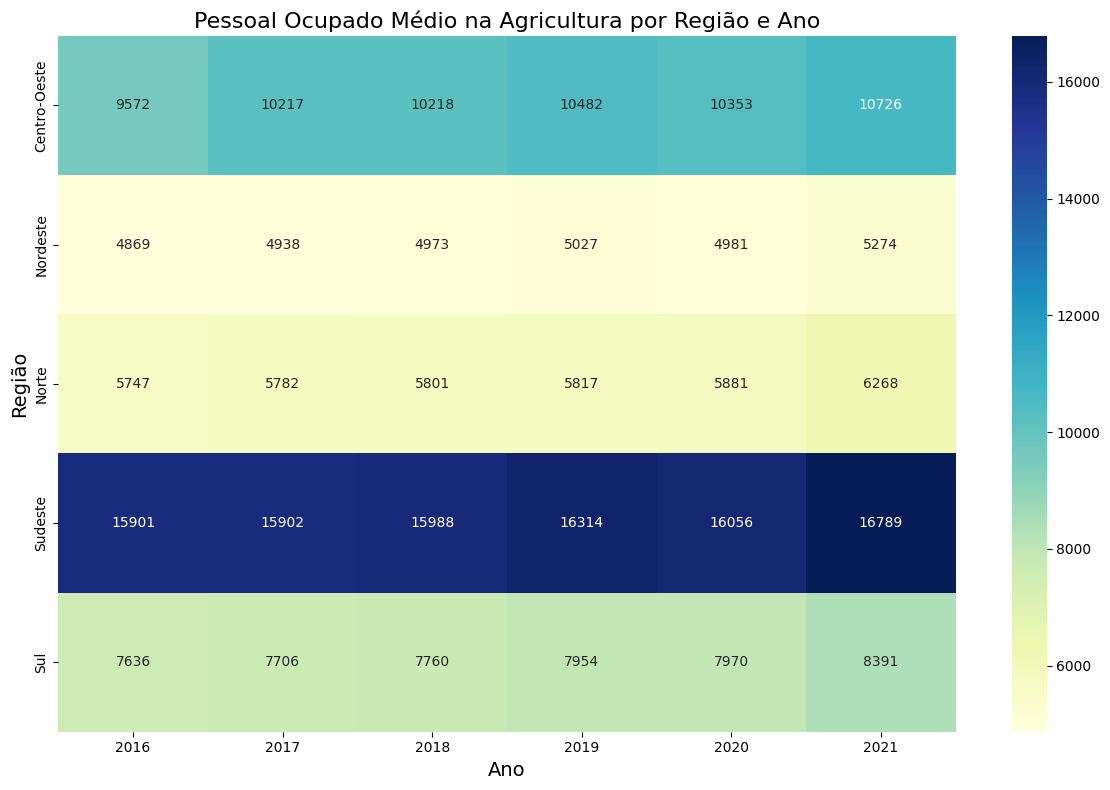

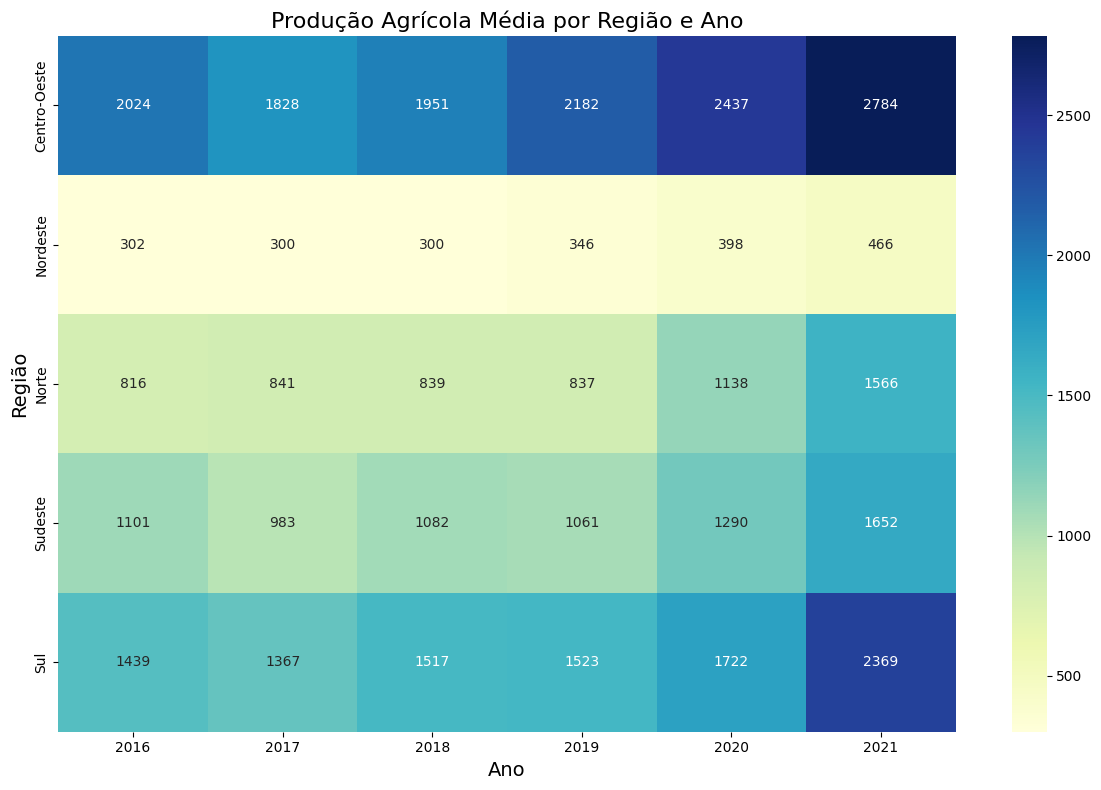

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Garantir que as colunas são numéricas e tratar NaNs
df['PessoalOcupado'] = pd.to_numeric(df['PessoalOcupado'], errors='coerce')
df['VlProducaoAgricola'] = pd.to_numeric(df['VlProducaoAgricola'], errors='coerce')
df['Ano'] = pd.to_numeric(df['Ano'], errors='coerce') # Garantir que Ano é numérico para agrupar

# Remover NaNs nas colunas essenciais
df_plot = df.copy()
df_plot.dropna(subset=['PessoalOcupado', 'VlProducaoAgricola', 'Regiao', 'Ano'], inplace=True)

# --- Heatmap para Pessoal Ocupado Médio por Região e Ano ---

# Agrupar por Ano e Região e calcular a média do Pessoal Ocupado
df_pessoal_anual_regiao = df_plot.groupby(['Ano', 'Regiao'])['PessoalOcupado'].mean().reset_index()

# Pivotar a tabela para o formato de mapa de calor
df_pessoal_heatmap = df_pessoal_anual_regiao.pivot(index='Regiao', columns='Ano', values='PessoalOcupado')

plt.figure(figsize=(12, 8))
sns.heatmap(df_pessoal_heatmap, annot=True, fmt=".0f", cmap="YlGnBu") # fmt=".0f" formata como inteiro

plt.title('Pessoal Ocupado Médio na Agricultura por Região e Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Região', fontsize=14)
plt.tight_layout()
plt.show()

# --- Heatmap para Produção Agrícola Média por Região e Ano ---

# Agrupar por Ano e Região e calcular a média da Produção Agrícola
df_producao_anual_regiao = df_plot.groupby(['Ano', 'Regiao'])['VlProducaoAgricola'].mean().reset_index()

# Pivotar a tabela para o formato de mapa de calor
df_producao_heatmap = df_producao_anual_regiao.pivot(index='Regiao', columns='Ano', values='VlProducaoAgricola')

plt.figure(figsize=(12, 8))
sns.heatmap(df_producao_heatmap, annot=True, fmt=".0f", cmap="YlGnBu") # fmt=".0f" formata como inteiro

plt.title('Produção Agrícola Média por Região e Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Região', fontsize=14)
plt.tight_layout()
plt.show()

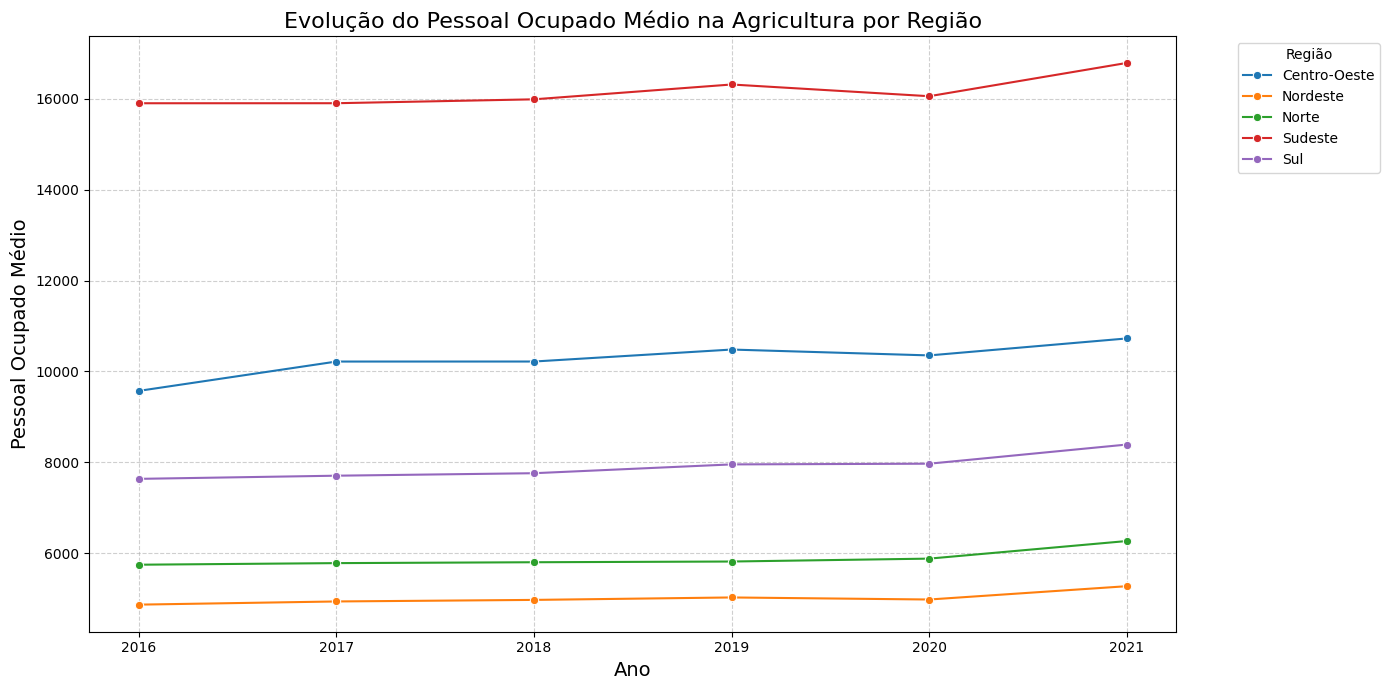

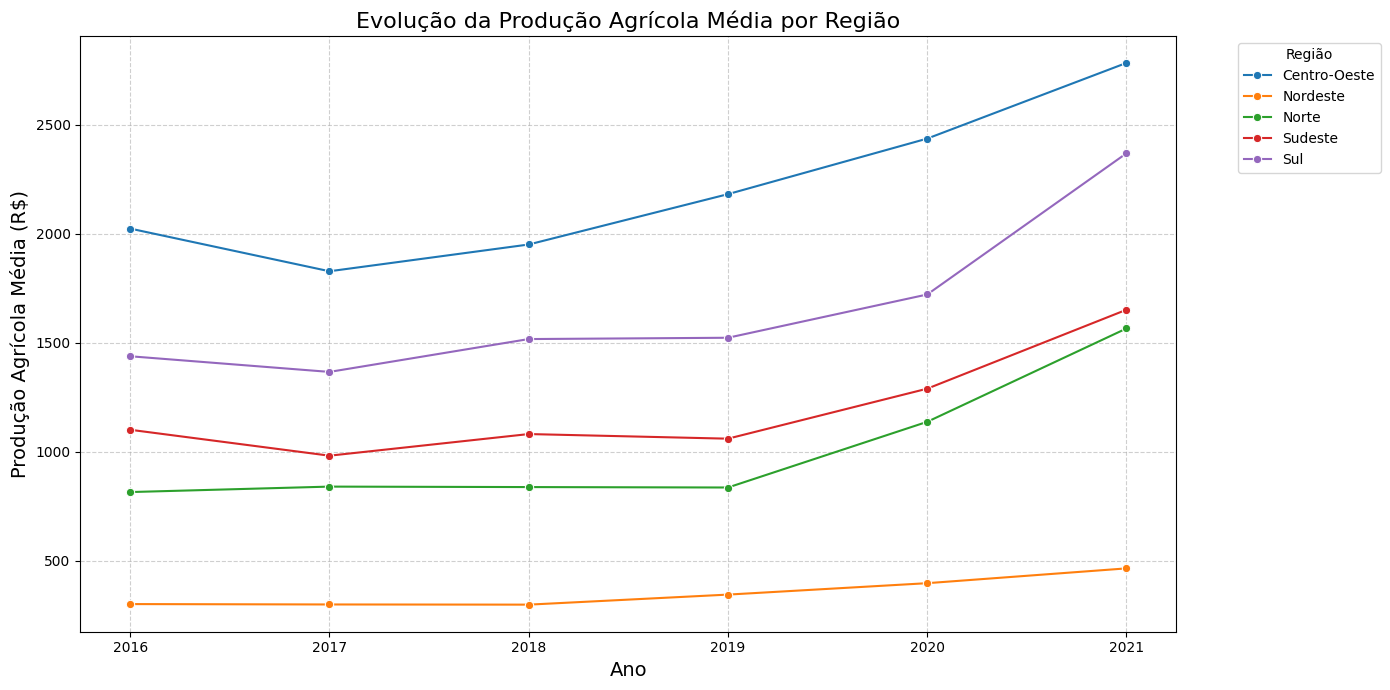

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Garantir que as colunas são numéricas e tratar NaNs
df['PessoalOcupado'] = pd.to_numeric(df['PessoalOcupado'], errors='coerce')
df['VlProducaoAgricola'] = pd.to_numeric(df['VlProducaoAgricola'], errors='coerce')
df['Ano'] = pd.to_numeric(df['Ano'], errors='coerce')

# Remover NaNs nas colunas essenciais
df_plot = df.copy()
df_plot.dropna(subset=['PessoalOcupado', 'VlProducaoAgricola', 'Regiao', 'Ano'], inplace=True)

# Agrupar por Ano e Região e calcular as médias
df_anual_regiao = df_plot.groupby(['Ano', 'Regiao'])[['PessoalOcupado', 'VlProducaoAgricola']].mean().reset_index()

# --- Gráfico de Linha para Pessoal Ocupado Médio por Região e Ano ---
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_anual_regiao, x='Ano', y='PessoalOcupado', hue='Regiao', marker='o')
plt.title('Evolução do Pessoal Ocupado Médio na Agricultura por Região', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Pessoal Ocupado Médio', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Gráfico de Linha para Produção Agrícola Média por Região e Ano ---
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_anual_regiao, x='Ano', y='VlProducaoAgricola', hue='Regiao', marker='o')
plt.title('Evolução da Produção Agrícola Média por Região', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Produção Agrícola Média (R$)', fontsize=14)
# Considere escala logarítmica para o eixo Y se a produção variar muito entre regiões ou anos
# plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

📊 2. Estabelecendo uma relação entre Pessoal Ocupado e Produção Agrícola

# 📊 2.1 Regressão: Mão de obra x Produção agricola (sem outliers)


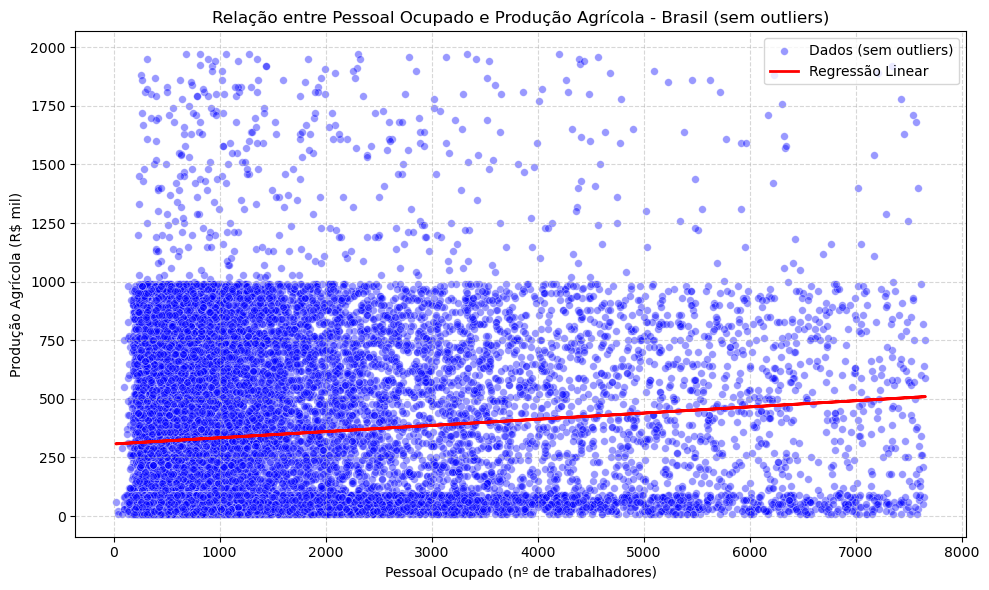

Equação da Regressão: ProduçãoAgrícola = 0.03 * PessoalOcupado + 307.83
R² = 0.0128


In [ ]:

# Dados válidos
df_valid = df[['PessoalOcupado', 'VlProducaoAgricola']].dropna()
df_valid = df_valid[(df_valid['PessoalOcupado'] > 0) & (df_valid['VlProducaoAgricola'] > 0)]

# Função para remover outliers com IQR
def remover_outliers_iqr(data, coluna):
    Q1 = data[coluna].quantile(0.25)
    Q3 = data[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return data[(data[coluna] >= lim_inf) & (data[coluna] <= lim_sup)]

# Aplicar para ambas as colunas
df_valid = remover_outliers_iqr(df_valid, 'PessoalOcupado')
df_valid = remover_outliers_iqr(df_valid, 'VlProducaoAgricola')

# Regressão linear
X = df_valid[['PessoalOcupado']]
y = df_valid['VlProducaoAgricola']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)

# Gráfico com melhorias
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='PessoalOcupado',
    y='VlProducaoAgricola',
    data=df_valid,
    alpha=0.4,
    s=30,
    color='blue',
    label='Dados (sem outliers)'
)
plt.plot(df_valid['PessoalOcupado'], y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel("Pessoal Ocupado (nº de trabalhadores)")
plt.ylabel("Produção Agrícola (R$ mil)")
plt.title("Relação entre Pessoal Ocupado e Produção Agrícola - Brasil (sem outliers)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Resultado da equação
coef = modelo.coef_[0]
intercept = modelo.intercept_
print(f"Equação da Regressão: ProduçãoAgrícola = {coef:.2f} * PessoalOcupado + {intercept:.2f}")
print(f"R² = {r2:.4f}")


NAO NECESSARIAMENTE PRODUÇÃO AGRICOLA E AREA PLANTADA SÃO BONS PARAMETROS, 
MUDEI A VARIAVEL INDEPENDENTE PARA AREA PLANTADA

# 📊 2.1 Regressão: Regressão: Produção Agrícola  Área Plantada

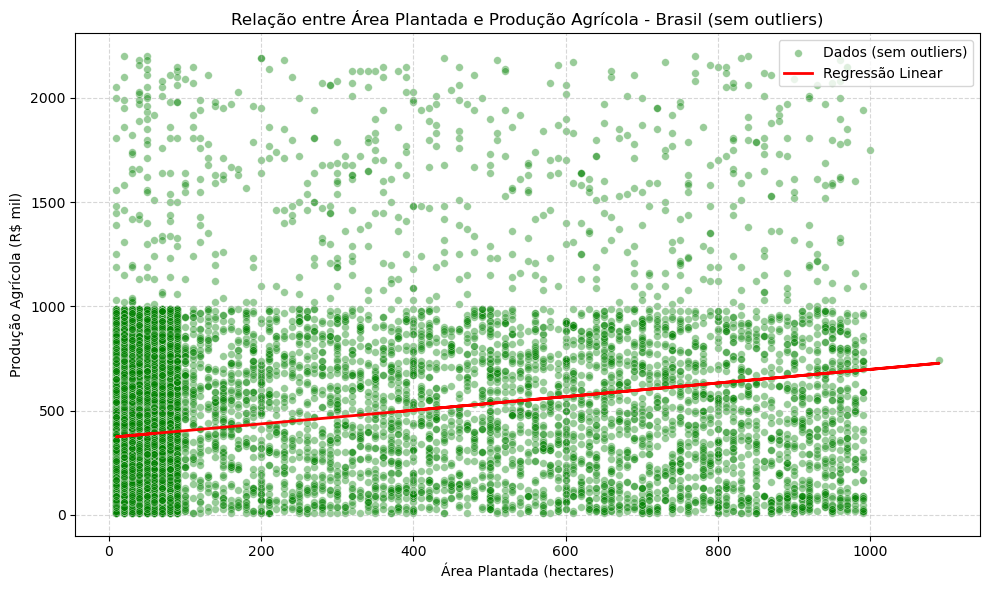

Equação da Regressão: ProduçãoAgrícola = 0.3267 * ÁreaPlantada_h + 371.45
R² = 0.0466


In [ ]:

# Filtrar dados válidos
df_valid = df[['AreaPlantada_h', 'VlProducaoAgricola']].dropna()
df_valid = df_valid[(df_valid['AreaPlantada_h'] > 0) & (df_valid['VlProducaoAgricola'] > 0)]

# Função para remover outliers com IQR
def remover_outliers_iqr(data, coluna):
    Q1 = data[coluna].quantile(0.25)
    Q3 = data[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return data[(data[coluna] >= lim_inf) & (data[coluna] <= lim_sup)]

# Remover outliers de ambas as colunas
df_valid = remover_outliers_iqr(df_valid, 'AreaPlantada_h')
df_valid = remover_outliers_iqr(df_valid, 'VlProducaoAgricola')

# Regressão linear
X = df_valid[['AreaPlantada_h']]
y = df_valid['VlProducaoAgricola']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)

# Gráfico
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='AreaPlantada_h',
    y='VlProducaoAgricola',
    data=df_valid,
    alpha=0.4,
    s=30,
    color='green',
    label='Dados (sem outliers)'
)
plt.plot(df_valid['AreaPlantada_h'], y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel("Área Plantada (hectares)")
plt.ylabel("Produção Agrícola (R$ mil)")
plt.title("Relação entre Área Plantada e Produção Agrícola - Brasil (sem outliers)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Resultados da regressão
coef = modelo.coef_[0]
intercept = modelo.intercept_
print(f"Equação da Regressão: ProduçãoAgrícola = {coef:.4f} * ÁreaPlantada_h + {intercept:.2f}")
print(f"R² = {r2:.4f}")


📊 2.1 Regressão: Produção agricola centro-oeste // Removendo outliers

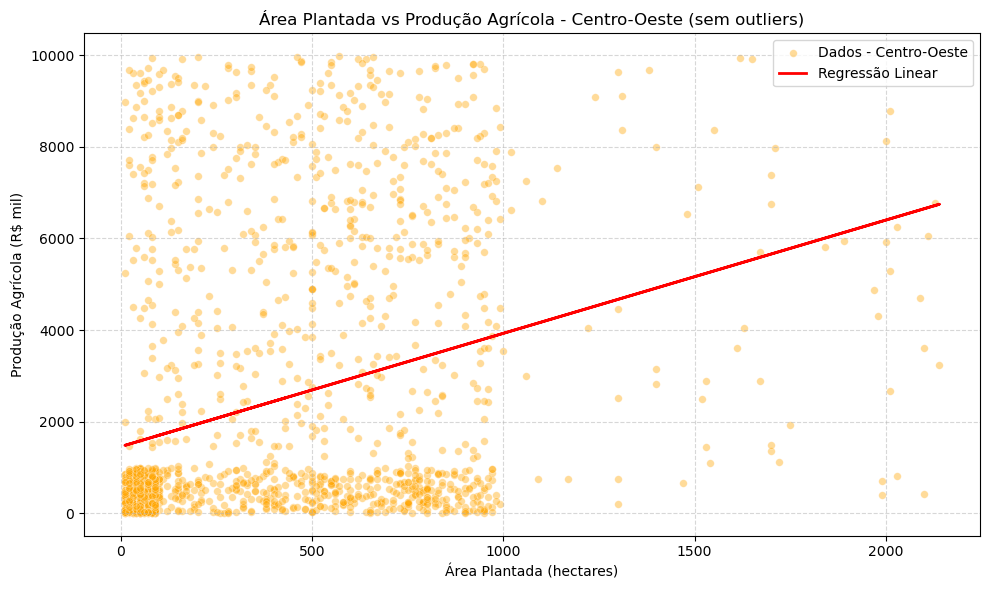

📍 Região: Centro-Oeste
Equação da Regressão: ProduçãoAgrícola = 2.4712 * ÁreaPlantada_h + 1458.97
R² = 0.1010


In [ ]:

regiao_alvo = 'Centro-Oeste' 

# Filtrar dados válidos da região
df_regiao = df[df['Regiao'] == regiao_alvo].copy()
df_regiao = df_regiao[['AreaPlantada_h', 'VlProducaoAgricola']].dropna()
df_regiao = df_regiao[(df_regiao['AreaPlantada_h'] > 0) & (df_regiao['VlProducaoAgricola'] > 0)]

# Função para remover outliers (IQR)
def remover_outliers_iqr(data, coluna):
    Q1 = data[coluna].quantile(0.25)
    Q3 = data[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return data[(data[coluna] >= lim_inf) & (data[coluna] <= lim_sup)]

# Remover outliers
df_regiao = remover_outliers_iqr(df_regiao, 'AreaPlantada_h')
df_regiao = remover_outliers_iqr(df_regiao, 'VlProducaoAgricola')

# Regressão
X = df_regiao[['AreaPlantada_h']]
y = df_regiao['VlProducaoAgricola']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)

# Gráfico
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='AreaPlantada_h',
    y='VlProducaoAgricola',
    data=df_regiao,
    alpha=0.4,
    s=30,
    color='orange',
    label=f'Dados - {regiao_alvo}'
)
plt.plot(df_regiao['AreaPlantada_h'], y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel("Área Plantada (hectares)")
plt.ylabel("Produção Agrícola (R$ mil)")
plt.title(f"Área Plantada vs Produção Agrícola - {regiao_alvo} (sem outliers)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Resultados
coef = modelo.coef_[0]
intercept = modelo.intercept_
print(f"📍 Região: {regiao_alvo}")
print(f"Equação da Regressão: ProduçãoAgrícola = {coef:.4f} * ÁreaPlantada_h + {intercept:.2f}")
print(f"R² = {r2:.4f}")


📊 2.1 Regressão: Produção agricola Sul// Removendo outliers

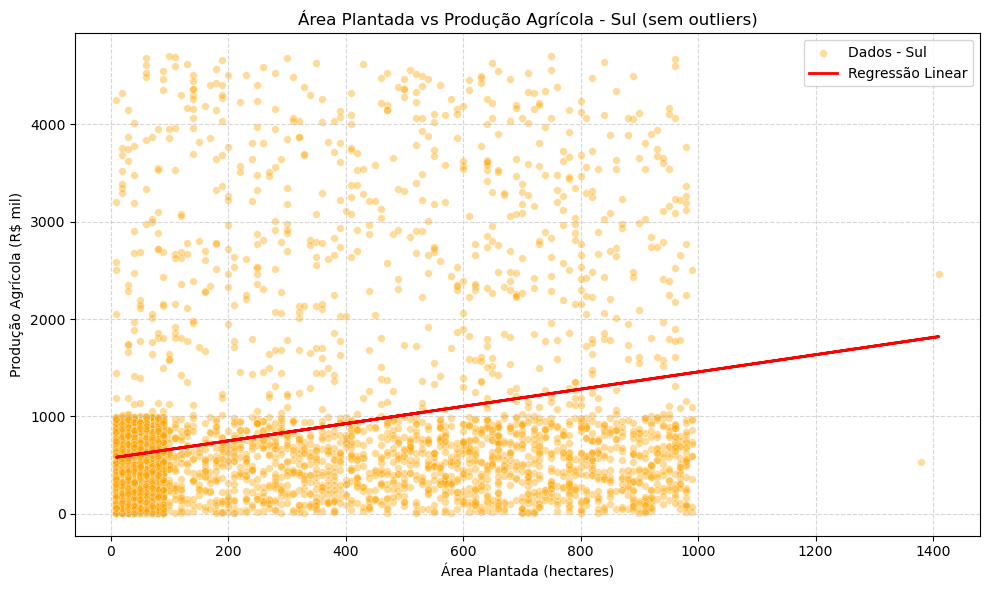

📍 Região: Sul
Equação da Regressão: ProduçãoAgrícola = 0.8848 * ÁreaPlantada_h + 572.67
R² = 0.0763


In [ ]:

regiao_alvo = 'Sul' 

# Filtrar dados válidos da região
df_regiao = df[df['Regiao'] == regiao_alvo].copy()
df_regiao = df_regiao[['AreaPlantada_h', 'VlProducaoAgricola']].dropna()
df_regiao = df_regiao[(df_regiao['AreaPlantada_h'] > 0) & (df_regiao['VlProducaoAgricola'] > 0)]

# Função para remover outliers (IQR)
def remover_outliers_iqr(data, coluna):
    Q1 = data[coluna].quantile(0.25)
    Q3 = data[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return data[(data[coluna] >= lim_inf) & (data[coluna] <= lim_sup)]

# Remover outliers
df_regiao = remover_outliers_iqr(df_regiao, 'AreaPlantada_h')
df_regiao = remover_outliers_iqr(df_regiao, 'VlProducaoAgricola')

# Regressão
X = df_regiao[['AreaPlantada_h']]
y = df_regiao['VlProducaoAgricola']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)

# Gráfico
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='AreaPlantada_h',
    y='VlProducaoAgricola',
    data=df_regiao,
    alpha=0.4,
    s=30,
    color='orange',
    label=f'Dados - {regiao_alvo}'
)
plt.plot(df_regiao['AreaPlantada_h'], y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel("Área Plantada (hectares)")
plt.ylabel("Produção Agrícola (R$ mil)")
plt.title(f"Área Plantada vs Produção Agrícola - {regiao_alvo} (sem outliers)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Resultados
coef = modelo.coef_[0]
intercept = modelo.intercept_
print(f"📍 Região: {regiao_alvo}")
print(f"Equação da Regressão: ProduçãoAgrícola = {coef:.4f} * ÁreaPlantada_h + {intercept:.2f}")
print(f"R² = {r2:.4f}")


📊 2.1 Regressão: Produção agricola Nordeste // Removendo outliers

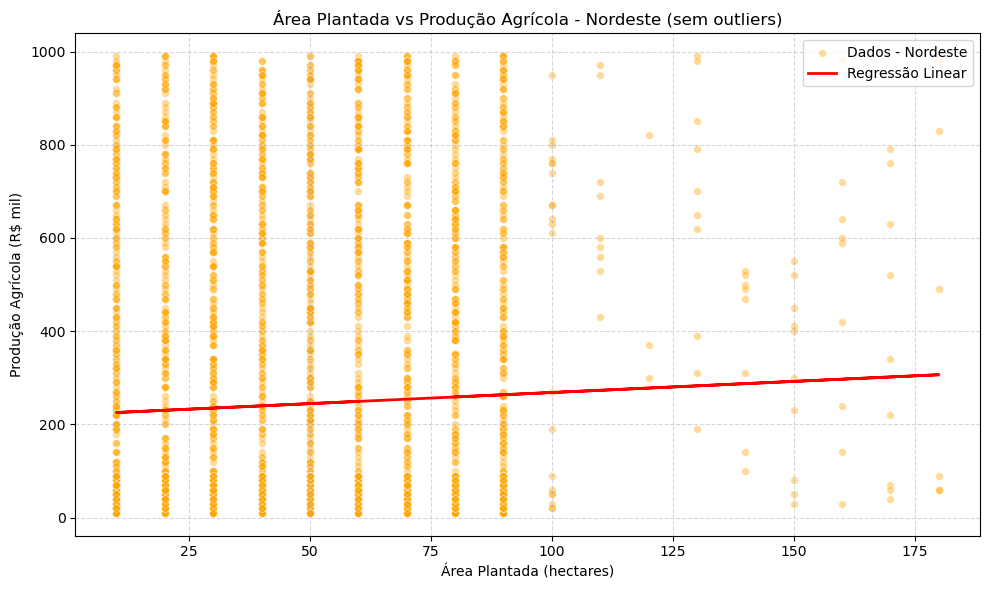

📍 Região: Nordeste
Equação da Regressão: ProduçãoAgrícola = 0.4768 * ÁreaPlantada_h + 220.62
R² = 0.0021


In [ ]:

regiao_alvo = 'Nordeste'  

# Filtrar dados válidos da região
df_regiao = df[df['Regiao'] == regiao_alvo].copy()
df_regiao = df_regiao[['AreaPlantada_h', 'VlProducaoAgricola']].dropna()
df_regiao = df_regiao[(df_regiao['AreaPlantada_h'] > 0) & (df_regiao['VlProducaoAgricola'] > 0)]

# Função para remover outliers (IQR)
def remover_outliers_iqr(data, coluna):
    Q1 = data[coluna].quantile(0.25)
    Q3 = data[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return data[(data[coluna] >= lim_inf) & (data[coluna] <= lim_sup)]

# Remover outliers
df_regiao = remover_outliers_iqr(df_regiao, 'AreaPlantada_h')
df_regiao = remover_outliers_iqr(df_regiao, 'VlProducaoAgricola')

# Regressão
X = df_regiao[['AreaPlantada_h']]
y = df_regiao['VlProducaoAgricola']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)

# Gráfico
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='AreaPlantada_h',
    y='VlProducaoAgricola',
    data=df_regiao,
    alpha=0.4,
    s=30,
    color='orange',
    label=f'Dados - {regiao_alvo}'
)
plt.plot(df_regiao['AreaPlantada_h'], y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel("Área Plantada (hectares)")
plt.ylabel("Produção Agrícola (R$ mil)")
plt.title(f"Área Plantada vs Produção Agrícola - {regiao_alvo} (sem outliers)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Resultados
coef = modelo.coef_[0]
intercept = modelo.intercept_
print(f"📍 Região: {regiao_alvo}")
print(f"Equação da Regressão: ProduçãoAgrícola = {coef:.4f} * ÁreaPlantada_h + {intercept:.2f}")
print(f"R² = {r2:.4f}")


📊 2.1 Regressão: Produção agricola Sudeste // Removendo outliers

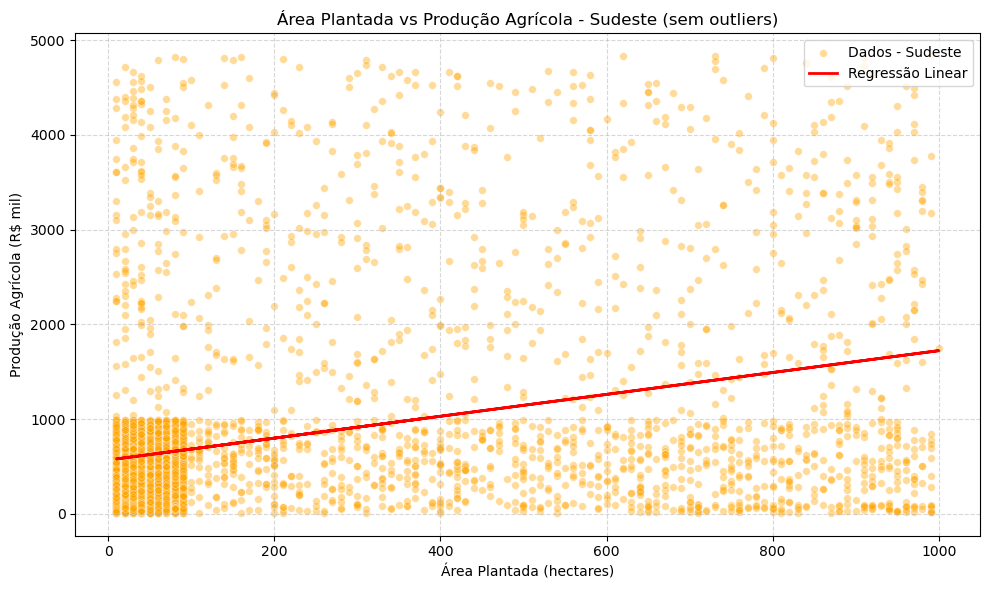

📍 Região: Sudeste
Equação da Regressão: ProduçãoAgrícola = 1.1543 * ÁreaPlantada_h + 568.00
R² = 0.1002


In [ ]:

regiao_alvo = 'Sudeste'  

# Filtrar dados válidos da região
df_regiao = df[df['Regiao'] == regiao_alvo].copy()
df_regiao = df_regiao[['AreaPlantada_h', 'VlProducaoAgricola']].dropna()
df_regiao = df_regiao[(df_regiao['AreaPlantada_h'] > 0) & (df_regiao['VlProducaoAgricola'] > 0)]

# Função para remover outliers (IQR)
def remover_outliers_iqr(data, coluna):
    Q1 = data[coluna].quantile(0.25)
    Q3 = data[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return data[(data[coluna] >= lim_inf) & (data[coluna] <= lim_sup)]

# Remover outliers
df_regiao = remover_outliers_iqr(df_regiao, 'AreaPlantada_h')
df_regiao = remover_outliers_iqr(df_regiao, 'VlProducaoAgricola')

# Regressão
X = df_regiao[['AreaPlantada_h']]
y = df_regiao['VlProducaoAgricola']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)

# Gráfico
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='AreaPlantada_h',
    y='VlProducaoAgricola',
    data=df_regiao,
    alpha=0.4,
    s=30,
    color='orange',
    label=f'Dados - {regiao_alvo}'
)
plt.plot(df_regiao['AreaPlantada_h'], y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel("Área Plantada (hectares)")
plt.ylabel("Produção Agrícola (R$ mil)")
plt.title(f"Área Plantada vs Produção Agrícola - {regiao_alvo} (sem outliers)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Resultados
coef = modelo.coef_[0]
intercept = modelo.intercept_
print(f"📍 Região: {regiao_alvo}")
print(f"Equação da Regressão: ProduçãoAgrícola = {coef:.4f} * ÁreaPlantada_h + {intercept:.2f}")
print(f"R² = {r2:.4f}")


📊 2.1 Regressão: Produção agricola Norte // Removendo outliers

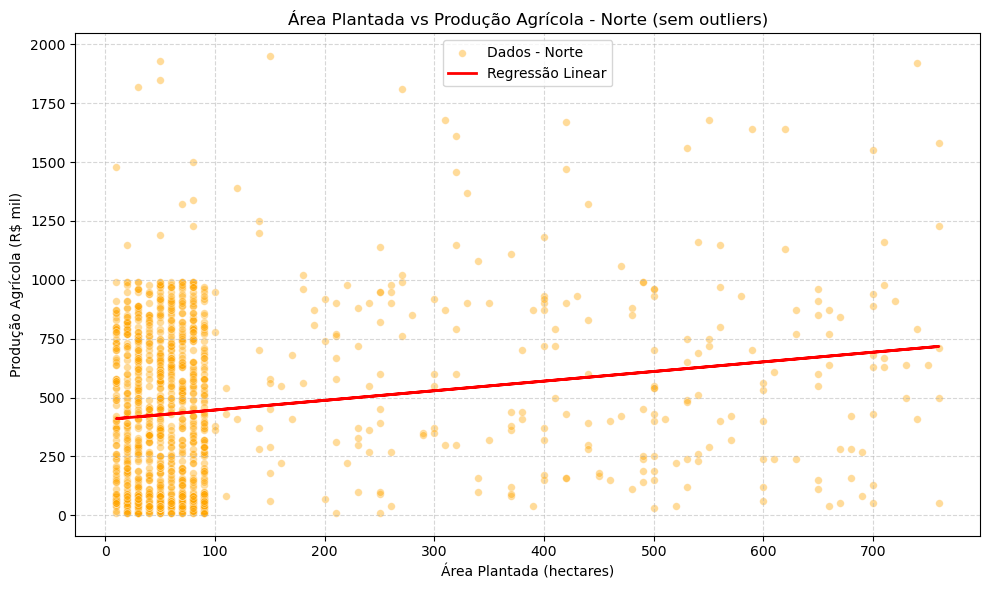

📍 Região: Norte
Equação da Regressão: ProduçãoAgrícola = 0.4089 * ÁreaPlantada_h + 406.21
R² = 0.0376


In [ ]:

regiao_alvo = 'Norte'  

# Filtrar dados válidos da região
df_regiao = df[df['Regiao'] == regiao_alvo].copy()
df_regiao = df_regiao[['AreaPlantada_h', 'VlProducaoAgricola']].dropna()
df_regiao = df_regiao[(df_regiao['AreaPlantada_h'] > 0) & (df_regiao['VlProducaoAgricola'] > 0)]

# Função para remover outliers (IQR)
def remover_outliers_iqr(data, coluna):
    Q1 = data[coluna].quantile(0.25)
    Q3 = data[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return data[(data[coluna] >= lim_inf) & (data[coluna] <= lim_sup)]

# Remover outliers
df_regiao = remover_outliers_iqr(df_regiao, 'AreaPlantada_h')
df_regiao = remover_outliers_iqr(df_regiao, 'VlProducaoAgricola')

# Regressão
X = df_regiao[['AreaPlantada_h']]
y = df_regiao['VlProducaoAgricola']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)

# Gráfico
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='AreaPlantada_h',
    y='VlProducaoAgricola',
    data=df_regiao,
    alpha=0.4,
    s=30,
    color='orange',
    label=f'Dados - {regiao_alvo}'
)
plt.plot(df_regiao['AreaPlantada_h'], y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel("Área Plantada (hectares)")
plt.ylabel("Produção Agrícola (R$ mil)")
plt.title(f"Área Plantada vs Produção Agrícola - {regiao_alvo} (sem outliers)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Resultados
coef = modelo.coef_[0]
intercept = modelo.intercept_
print(f"📍 Região: {regiao_alvo}")
print(f"Equação da Regressão: ProduçãoAgrícola = {coef:.4f} * ÁreaPlantada_h + {intercept:.2f}")
print(f"R² = {r2:.4f}")


BONUS: TESTAR AREA COLHIDA

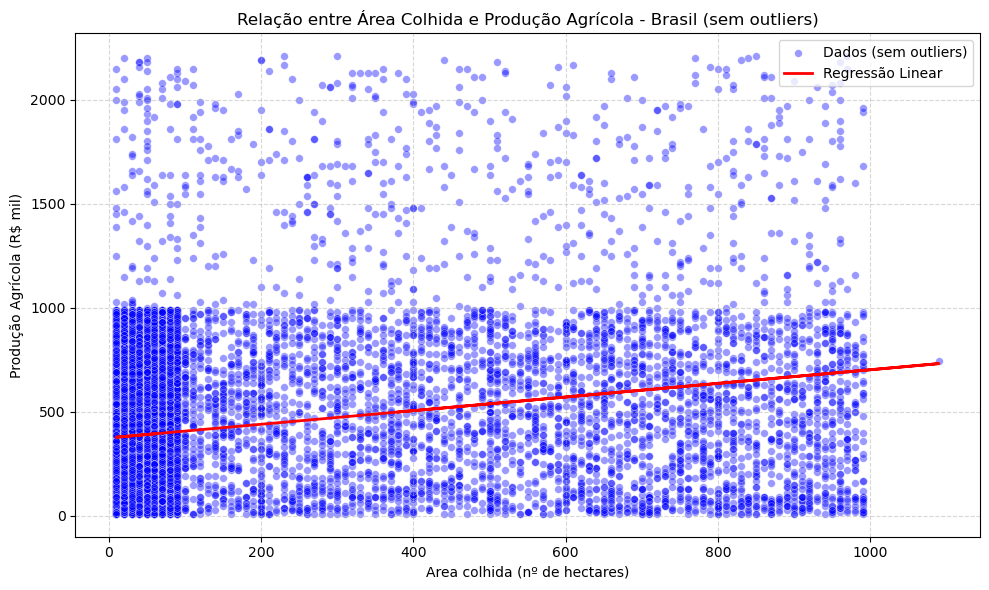

Equação da Regressão: ProduçãoAgrícola = 0.33 * AreaColhida_h + 375.04
R² = 0.0468


In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Dados válidos
df_valid = df[['AreaColhida_h', 'VlProducaoAgricola']].dropna()
df_valid = df_valid[(df_valid['AreaColhida_h'] > 0) & (df_valid['VlProducaoAgricola'] > 0)]

# Função para remover outliers com IQR
def remover_outliers_iqr(data, coluna):
    Q1 = data[coluna].quantile(0.25)
    Q3 = data[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return data[(data[coluna] >= lim_inf) & (data[coluna] <= lim_sup)]

# Aplicar para ambas as colunas
df_valid = remover_outliers_iqr(df_valid, 'AreaColhida_h')
df_valid = remover_outliers_iqr(df_valid, 'VlProducaoAgricola')

# Regressão linear
X = df_valid[['AreaColhida_h']]
y = df_valid['VlProducaoAgricola']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)

# Gráfico com melhorias
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='AreaColhida_h',
    y='VlProducaoAgricola',
    data=df_valid,
    alpha=0.4,
    s=30,
    color='blue',
    label='Dados (sem outliers)'
)
plt.plot(df_valid['AreaColhida_h'], y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel("Area colhida (nº de hectares)")
plt.ylabel("Produção Agrícola (R$ mil)")
plt.title("Relação entre Área Colhida e Produção Agrícola - Brasil (sem outliers)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Resultado da equação
coef = modelo.coef_[0]
intercept = modelo.intercept_
print(f"Equação da Regressão: ProduçãoAgrícola = {coef:.2f} * AreaColhida_h + {intercept:.2f}")
print(f"R² = {r2:.4f}")


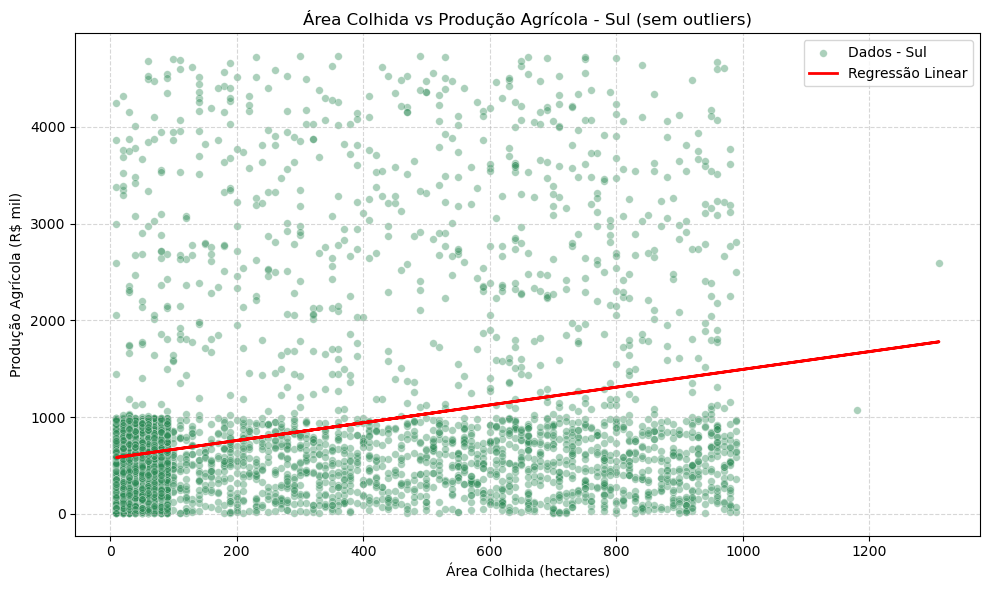

📍 Região: Sul
Equação da Regressão: ProduçãoAgrícola = 0.9190 * ÁreaColhida_h + 573.97
R² = 0.0790


In [ ]:

regiao_alvo = 'Sul'  

# Filtrar dados válidos da região
df_regiao = df[df['Regiao'] == regiao_alvo].copy()
df_regiao = df_regiao[['AreaColhida_h', 'VlProducaoAgricola']].dropna()
df_regiao = df_regiao[(df_regiao['AreaColhida_h'] > 0) & (df_regiao['VlProducaoAgricola'] > 0)]

# Função para remover outliers (IQR)
def remover_outliers_iqr(data, coluna):
    Q1 = data[coluna].quantile(0.25)
    Q3 = data[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return data[(data[coluna] >= lim_inf) & (data[coluna] <= lim_sup)]

# Remover outliers
df_regiao = remover_outliers_iqr(df_regiao, 'AreaColhida_h')
df_regiao = remover_outliers_iqr(df_regiao, 'VlProducaoAgricola')

# Regressão
X = df_regiao[['AreaColhida_h']]
y = df_regiao['VlProducaoAgricola']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)

# Gráfico
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='AreaColhida_h',
    y='VlProducaoAgricola',
    data=df_regiao,
    alpha=0.4,
    s=30,
    color='seagreen',
    label=f'Dados - {regiao_alvo}'
)
plt.plot(df_regiao['AreaColhida_h'], y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel("Área Colhida (hectares)")
plt.ylabel("Produção Agrícola (R$ mil)")
plt.title(f"Área Colhida vs Produção Agrícola - {regiao_alvo} (sem outliers)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Resultados
coef = modelo.coef_[0]
intercept = modelo.intercept_
print(f"📍 Região: {regiao_alvo}")
print(f"Equação da Regressão: ProduçãoAgrícola = {coef:.4f} * ÁreaColhida_h + {intercept:.2f}")
print(f"R² = {r2:.4f}")


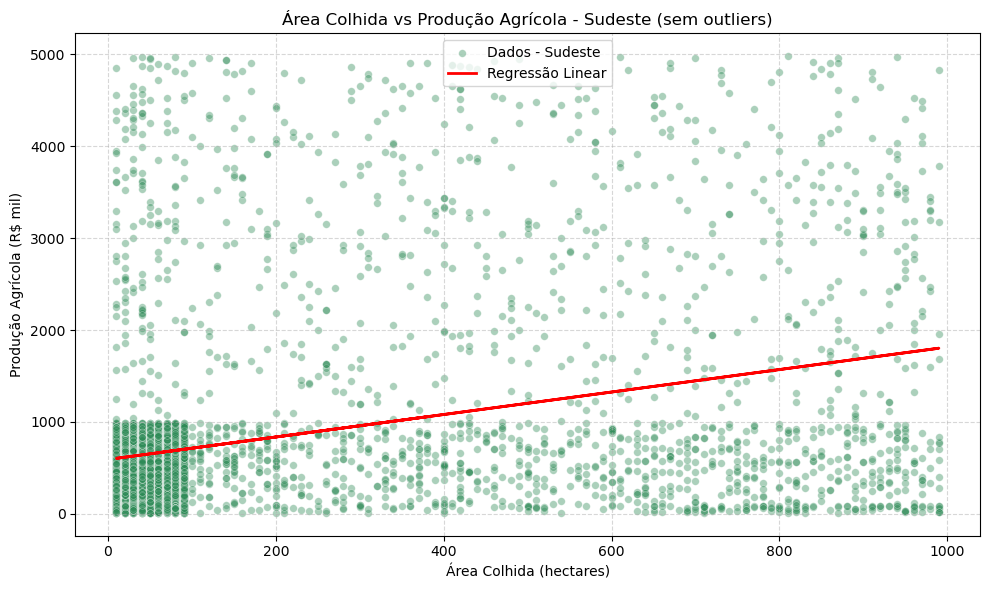

📍 Região: Sudeste
Equação da Regressão: ProduçãoAgrícola = 1.2228 * ÁreaColhida_h + 591.38
R² = 0.1014


In [ ]:

regiao_alvo = 'Sudeste'  
# Filtrar dados válidos da região
df_regiao = df[df['Regiao'] == regiao_alvo].copy()
df_regiao = df_regiao[['AreaColhida_h', 'VlProducaoAgricola']].dropna()
df_regiao = df_regiao[(df_regiao['AreaColhida_h'] > 0) & (df_regiao['VlProducaoAgricola'] > 0)]

# Função para remover outliers (IQR)
def remover_outliers_iqr(data, coluna):
    Q1 = data[coluna].quantile(0.25)
    Q3 = data[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return data[(data[coluna] >= lim_inf) & (data[coluna] <= lim_sup)]

# Remover outliers
df_regiao = remover_outliers_iqr(df_regiao, 'AreaColhida_h')
df_regiao = remover_outliers_iqr(df_regiao, 'VlProducaoAgricola')

# Regressão
X = df_regiao[['AreaColhida_h']]
y = df_regiao['VlProducaoAgricola']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)

# Gráfico
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='AreaColhida_h',
    y='VlProducaoAgricola',
    data=df_regiao,
    alpha=0.4,
    s=30,
    color='seagreen',
    label=f'Dados - {regiao_alvo}'
)
plt.plot(df_regiao['AreaColhida_h'], y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel("Área Colhida (hectares)")
plt.ylabel("Produção Agrícola (R$ mil)")
plt.title(f"Área Colhida vs Produção Agrícola - {regiao_alvo} (sem outliers)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Resultados
coef = modelo.coef_[0]
intercept = modelo.intercept_
print(f"📍 Região: {regiao_alvo}")
print(f"Equação da Regressão: ProduçãoAgrícola = {coef:.4f} * ÁreaColhida_h + {intercept:.2f}")
print(f"R² = {r2:.4f}")


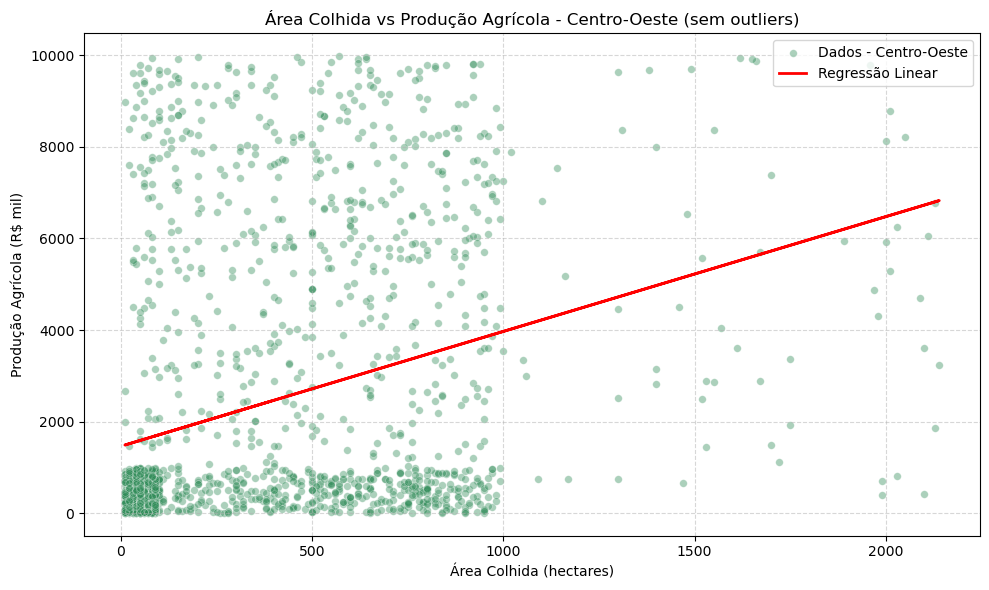

📍 Região: Centro-Oeste
Equação da Regressão: ProduçãoAgrícola = 2.5053 * ÁreaColhida_h + 1466.33
R² = 0.1037


In [ ]:

regiao_alvo = 'Centro-Oeste'  

df_regiao = df[df['Regiao'] == regiao_alvo].copy()
df_regiao = df_regiao[['AreaColhida_h', 'VlProducaoAgricola']].dropna()
df_regiao = df_regiao[(df_regiao['AreaColhida_h'] > 0) & (df_regiao['VlProducaoAgricola'] > 0)]

# Função para remover outliers (IQR)
def remover_outliers_iqr(data, coluna):
    Q1 = data[coluna].quantile(0.25)
    Q3 = data[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return data[(data[coluna] >= lim_inf) & (data[coluna] <= lim_sup)]

# Remover outliers
df_regiao = remover_outliers_iqr(df_regiao, 'AreaColhida_h')
df_regiao = remover_outliers_iqr(df_regiao, 'VlProducaoAgricola')

# Regressão
X = df_regiao[['AreaColhida_h']]
y = df_regiao['VlProducaoAgricola']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)

# Gráfico
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='AreaColhida_h',
    y='VlProducaoAgricola',
    data=df_regiao,
    alpha=0.4,
    s=30,
    color='seagreen',
    label=f'Dados - {regiao_alvo}'
)
plt.plot(df_regiao['AreaColhida_h'], y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel("Área Colhida (hectares)")
plt.ylabel("Produção Agrícola (R$ mil)")
plt.title(f"Área Colhida vs Produção Agrícola - {regiao_alvo} (sem outliers)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Resultados
coef = modelo.coef_[0]
intercept = modelo.intercept_
print(f"📍 Região: {regiao_alvo}")
print(f"Equação da Regressão: ProduçãoAgrícola = {coef:.4f} * ÁreaColhida_h + {intercept:.2f}")
print(f"R² = {r2:.4f}")


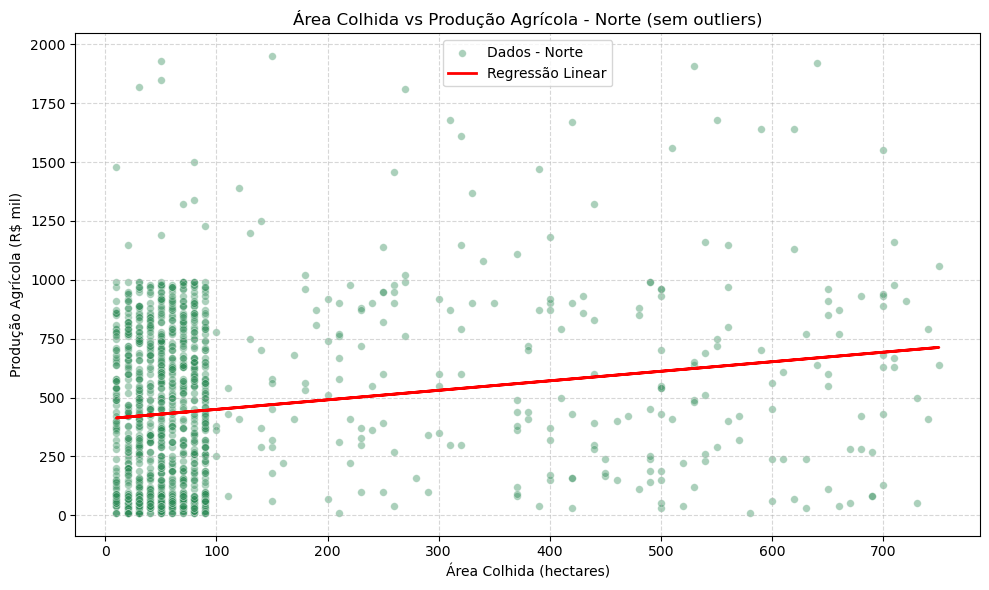

📍 Região: Norte
Equação da Regressão: ProduçãoAgrícola = 0.4047 * ÁreaColhida_h + 409.21
R² = 0.0340


In [ ]:


regiao_alvo = 'Norte'  
# Filtrar dados válidos da região
df_regiao = df[df['Regiao'] == regiao_alvo].copy()
df_regiao = df_regiao[['AreaColhida_h', 'VlProducaoAgricola']].dropna()
df_regiao = df_regiao[(df_regiao['AreaColhida_h'] > 0) & (df_regiao['VlProducaoAgricola'] > 0)]

# Função para remover outliers (IQR)
def remover_outliers_iqr(data, coluna):
    Q1 = data[coluna].quantile(0.25)
    Q3 = data[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return data[(data[coluna] >= lim_inf) & (data[coluna] <= lim_sup)]

# Remover outliers
df_regiao = remover_outliers_iqr(df_regiao, 'AreaColhida_h')
df_regiao = remover_outliers_iqr(df_regiao, 'VlProducaoAgricola')

# Regressão
X = df_regiao[['AreaColhida_h']]
y = df_regiao['VlProducaoAgricola']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)

# Gráfico
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='AreaColhida_h',
    y='VlProducaoAgricola',
    data=df_regiao,
    alpha=0.4,
    s=30,
    color='seagreen',
    label=f'Dados - {regiao_alvo}'
)
plt.plot(df_regiao['AreaColhida_h'], y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel("Área Colhida (hectares)")
plt.ylabel("Produção Agrícola (R$ mil)")
plt.title(f"Área Colhida vs Produção Agrícola - {regiao_alvo} (sem outliers)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Resultados
coef = modelo.coef_[0]
intercept = modelo.intercept_
print(f"📍 Região: {regiao_alvo}")
print(f"Equação da Regressão: ProduçãoAgrícola = {coef:.4f} * ÁreaColhida_h + {intercept:.2f}")
print(f"R² = {r2:.4f}")


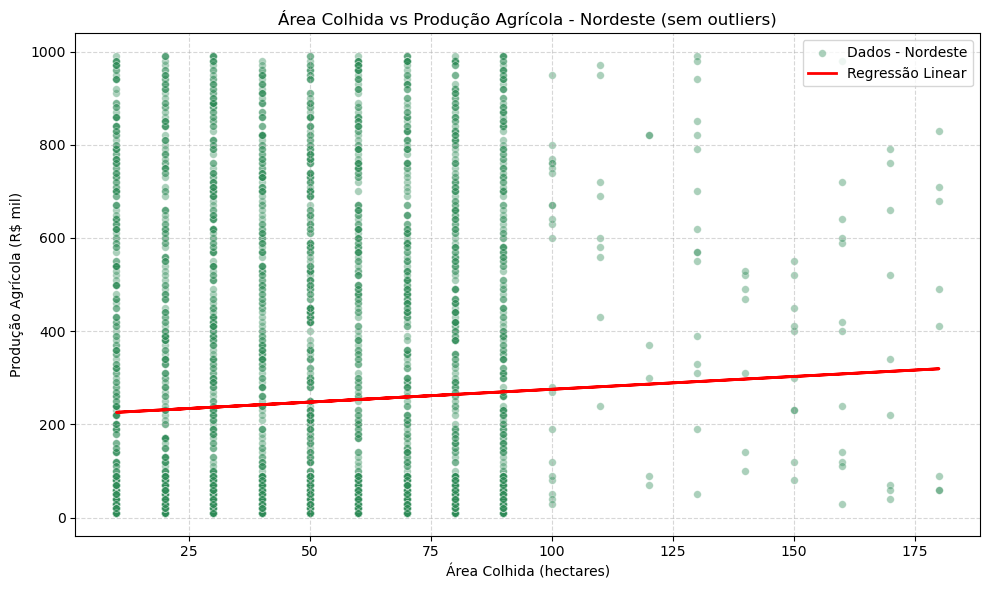

📍 Região: Nordeste
Equação da Regressão: ProduçãoAgrícola = 0.5495 * ÁreaColhida_h + 220.27
R² = 0.0028


In [ ]:

regiao_alvo = 'Nordeste'  

# Filtrar dados válidos da região
df_regiao = df[df['Regiao'] == regiao_alvo].copy()
df_regiao = df_regiao[['AreaColhida_h', 'VlProducaoAgricola']].dropna()
df_regiao = df_regiao[(df_regiao['AreaColhida_h'] > 0) & (df_regiao['VlProducaoAgricola'] > 0)]

# Função para remover outliers (IQR)
def remover_outliers_iqr(data, coluna):
    Q1 = data[coluna].quantile(0.25)
    Q3 = data[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return data[(data[coluna] >= lim_inf) & (data[coluna] <= lim_sup)]

# Remover outliers
df_regiao = remover_outliers_iqr(df_regiao, 'AreaColhida_h')
df_regiao = remover_outliers_iqr(df_regiao, 'VlProducaoAgricola')

# Regressão
X = df_regiao[['AreaColhida_h']]
y = df_regiao['VlProducaoAgricola']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)

# Gráfico
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='AreaColhida_h',
    y='VlProducaoAgricola',
    data=df_regiao,
    alpha=0.4,
    s=30,
    color='seagreen',
    label=f'Dados - {regiao_alvo}'
)
plt.plot(df_regiao['AreaColhida_h'], y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel("Área Colhida (hectares)")
plt.ylabel("Produção Agrícola (R$ mil)")
plt.title(f"Área Colhida vs Produção Agrícola - {regiao_alvo} (sem outliers)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Resultados
coef = modelo.coef_[0]
intercept = modelo.intercept_
print(f"📍 Região: {regiao_alvo}")
print(f"Equação da Regressão: ProduçãoAgrícola = {coef:.4f} * ÁreaColhida_h + {intercept:.2f}")
print(f"R² = {r2:.4f}")
